In [1]:
import tensorflow as tf

In [2]:
a=tf.constant(20)
b=tf.constant(30)

In [4]:
with tf.In as sess:
    result=sess.run(a*b)

AttributeError: module 'tensorflow' has no attribute 'Session'

In [6]:
print(tf.__version__)

2.1.0


In [2]:
import keras

Using TensorFlow backend.


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
hou=pd.read_csv('california_housing_sklearn.csv')

In [10]:
hou.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,SalePrice
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [11]:
from tensorflow.keras.callbacks import EarlyStopping

In [6]:
loan=pd.read_csv('lending_club_loan_two.csv')

In [10]:
loan['loan_status']

0          Fully Paid
1          Fully Paid
2          Fully Paid
3          Fully Paid
4         Charged Off
             ...     
396025     Fully Paid
396026     Fully Paid
396027     Fully Paid
396028     Fully Paid
396029     Fully Paid
Name: loan_status, Length: 396030, dtype: object

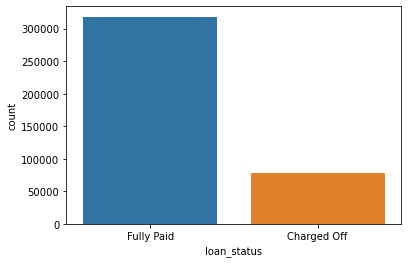

In [11]:
sns.countplot(x='loan_status',data=loan)

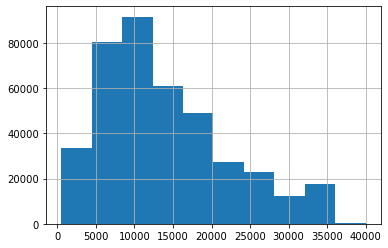

In [12]:
loan['loan_amnt'].hist()

In [17]:
plt.figure(figsize=(5,15))
loan.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


<Figure size 360x1080 with 0 Axes>

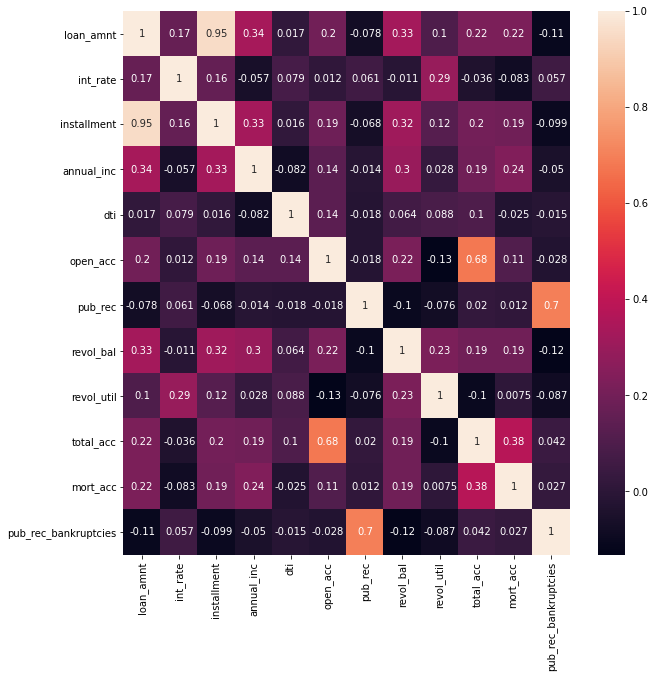

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(loan.corr(),annot=True)

In [23]:
loan['loan_status']=loan['loan_status'].map({'Fully Paid':1,'Charged Off':0})

In [24]:
loan['loan_status']

0         1
1         1
2         1
3         1
4         0
         ..
396025    1
396026    1
396027    1
396028    1
396029    1
Name: loan_status, Length: 396030, dtype: int64

In [25]:
loan.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [33]:
loan.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'purpose', 'title',
       'earliest_cr_line', 'initial_list_status', 'application_type',
       'address'],
      dtype='object')

In [38]:
hou=pd.read_csv('USA_Housing.csv')

In [39]:
hou.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [40]:
hou['Address']

0       208 Michael Ferry Apt. 674\nLaurabury, NE 3701...
1       188 Johnson Views Suite 079\nLake Kathleen, CA...
2       9127 Elizabeth Stravenue\nDanieltown, WI 06482...
3                               USS Barnett\nFPO AP 44820
4                              USNS Raymond\nFPO AE 09386
                              ...                        
4995                     USNS Williams\nFPO AP 30153-7653
4996                PSC 9258, Box 8489\nAPO AA 42991-3352
4997    4215 Tracy Garden Suite 076\nJoshualand, VA 01...
4998                            USS Wallace\nFPO AE 73316
4999    37778 George Ridges Apt. 509\nEast Holly, NV 2...
Name: Address, Length: 5000, dtype: object

In [122]:
X=hou.drop(['Address','Price'],axis=1).values
y=hou['Price'].values

In [123]:
X

array([[7.95454586e+04, 5.68286132e+00, 7.00918814e+00, 4.09000000e+00,
        2.30868005e+04],
       [7.92486425e+04, 6.00289981e+00, 6.73082102e+00, 3.09000000e+00,
        4.01730722e+04],
       [6.12870672e+04, 5.86588984e+00, 8.51272743e+00, 5.13000000e+00,
        3.68821594e+04],
       ...,
       [6.33906869e+04, 7.25059061e+00, 4.80508098e+00, 2.13000000e+00,
        3.32661455e+04],
       [6.80013312e+04, 5.53438842e+00, 7.13014386e+00, 5.44000000e+00,
        4.26256202e+04],
       [6.55105818e+04, 5.99230531e+00, 6.79233610e+00, 4.07000000e+00,
        4.65012838e+04]])

In [124]:
y

array([1059033.55787012, 1505890.91484695, 1058987.98787608, ...,
       1030729.58315229, 1198656.87240769, 1298950.48026696])

In [125]:
from sklearn.preprocessing import StandardScaler

In [126]:
from sklearn.model_selection import train_test_split

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [128]:
X.shape

(5000, 5)

In [129]:
sd=StandardScaler()

In [130]:
X_train=sd.fit_transform(X_train)
X_test=sd.transform(X_test)

In [131]:
y_train

array([1094879.77349138, 1300389.35082021, 1382172.29370661, ...,
       1318597.71477866, 1708631.36537014, 1060897.6894524 ])

In [132]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout,Dense
from tensorflow.keras.callbacks import EarlyStopping

In [140]:
model=Sequential()
earls=EarlyStopping(mode='min',patience=15)

In [197]:
model.add(Dense(5,activation='relu'))
model.add(Dense(2,activation='relu'))
model.add(Dense(2,activation='relu'))
model.add(Dense(1))

model.compile(loss='mse',optimizer='rmsprop')
model.fit(x=X_train,y=y_train,epochs=50,batch_size=30,validation_data=(X_test,y_test),callbacks=[earls])

Train on 4000 samples, validate on 1000 samples
Epoch 1/50
4000/4000 [==============================] - 8s 2ms/sample - loss: 1654714420756.4800 - val_loss: 1665733200445.4399
Epoch 2/50
4000/4000 [==============================] - 1s 227us/sample - loss: 1636903486095.3601 - val_loss: 1665732867522.5601
Epoch 3/50
4000/4000 [==============================] - 1s 228us/sample - loss: 1636902901514.2400 - val_loss: 1665732246241.2800
Epoch 4/50
4000/4000 [==============================] - 1s 217us/sample - loss: 1636902227804.1602 - val_loss: 1665731348398.0801
Epoch 5/50
4000/4000 [==============================] - 1s 221us/sample - loss: 1636901466767.3601 - val_loss: 1665730674688.0000
Epoch 6/50
4000/4000 [==============================] - 1s 217us/sample - loss: 1636900592353.2800 - val_loss: 1665729757184.0000
Epoch 7/50
4000/4000 [==============================] - 1s 215us/sample - loss: 1636899669934.0801 - val_loss: 1665728560496.6399
Epoch 8/50
4000/4000 [======================

In [135]:
model.evaluate(X_train,y_train)

4000/4000 [==============================] - 0s 84us/sample - loss: 36572146663.4240


36572146663.424

In [198]:
loss=pd.DataFrame(model.history.history)

In [199]:
loss.tail()

,loss,val_loss
45,1.636794e+12,1.665620e+12
46,1.636789e+12,1.665616e+12
47,1.636785e+12,1.665611e+12
48,1.636780e+12,1.665606e+12
49,1.636775e+12,1.665601e+12


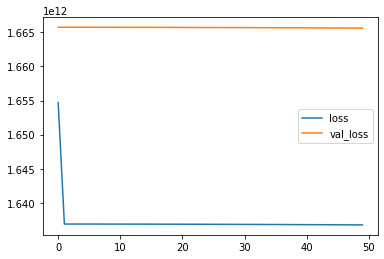

In [200]:
loss.plot()

In [195]:
from sklearn.metrics import explained_variance_score,mean_absolute_error,mean_squared_error,r2_score

In [190]:
preds=model.predict(X_test)

In [191]:
mean_absolute_error(y_test,preds)

279176.7273053784

In [192]:
hou['Price'].describe()

count    5.000000e+03
mean     1.232073e+06
std      3.531176e+05
min      1.593866e+04
25%      9.975771e+05
50%      1.232669e+06
75%      1.471210e+06
max      2.469066e+06
Name: Price, dtype: float64

In [193]:
explained_variance_score(y_test,preds)

0.0

In [196]:
r2_score(y_test,preds)

-0.001575130464833041

In [201]:
churn=pd.read_csv('Churn_Modelling.csv')

In [202]:
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [205]:
churn['NumOfProducts'].unique()

array([1, 3, 2, 4], dtype=int64)

In [206]:
churn=churn.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [207]:
churn.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [209]:
churn['Geography'].nunique()

3

In [213]:
from feature_engine.categorical_encoders import OneHotCategoricalEncoder

In [214]:
onc=OneHotCategoricalEncoder(variables=['Gender','Geography'])

In [215]:
churn=onc.fit_transform(churn)

In [216]:
churn.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male,Geography_France,Geography_Spain,Geography_Germany
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0,0,1,0


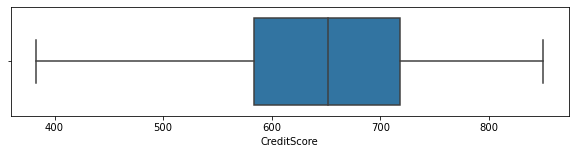

In [227]:
plt.figure(figsize=(10,2))
sns.boxplot(churn['CreditScore'],data=churn)

In [211]:
from feature_engine.outlier_removers import Winsorizer

In [225]:
out=Winsorizer(distribution='skewed',tail='both',fold=1.5,variables='CreditScore')

In [226]:
churn=out.fit_transform(churn)

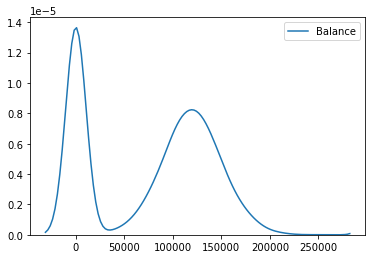

In [218]:
sns.kdeplot(churn['Balance'])

In [228]:
churn.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male,Geography_France,Geography_Spain,Geography_Germany
0,619.0,42,2,0.00,1,1,1,101348.88,1,1,0,1,0,0
1,608.0,41,1,83807.86,1,0,1,112542.58,0,1,0,0,1,0
2,502.0,42,8,159660.80,3,1,0,113931.57,1,1,0,1,0,0
3,699.0,39,1,0.00,2,0,0,93826.63,0,1,0,1,0,0
4,850.0,43,2,125510.82,1,1,1,79084.10,0,1,0,0,1,0


In [237]:
churn.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Gender_Female',
       'Gender_Male', 'Geography_France', 'Geography_Spain',
       'Geography_Germany'],
      dtype='object')

In [229]:
churn['Exited'].nunique()

2

In [230]:
X=churn.drop('Exited',axis=1).values
y=churn['Exited'].values

In [231]:
from sklearn.preprocessing import MinMaxScaler

In [232]:
minmax=MinMaxScaler()

In [233]:
from sklearn.model_selection import train_test_split

In [234]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [235]:
X_train=minmax.fit_transform(X_train)
X_test=minmax.transform(X_test)

In [236]:
X_train

array([[0.64882227, 0.18918919, 0.6       , ..., 1.        , 0.        ,
        0.        ],
       [0.53319058, 0.32432432, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.37687366, 0.08108108, 0.3       , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.75374732, 0.27027027, 0.1       , ..., 1.        , 0.        ,
        0.        ],
       [0.60813704, 0.33783784, 0.8       , ..., 1.        , 0.        ,
        0.        ],
       [0.67237687, 0.44594595, 0.1       , ..., 0.        , 0.        ,
        1.        ]])

In [264]:
model=Sequential()
earls=EarlyStopping(mode='min',patience=15)

model.add(Dense(12,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')
model.fit(x=X_train,y=y_train,epochs=150,batch_size=100,validation_data=(X_test,y_test),callbacks=[earls])

Train on 8000 samples, validate on 2000 samples
Epoch 1/150
8000/8000 [==============================] - 1s 178us/sample - loss: 0.6829 - val_loss: 0.6577
Epoch 2/150
8000/8000 [==============================] - 0s 30us/sample - loss: 0.6144 - val_loss: 0.5398
Epoch 3/150
8000/8000 [==============================] - 0s 35us/sample - loss: 0.5131 - val_loss: 0.4902
Epoch 4/150
8000/8000 [==============================] - 0s 28us/sample - loss: 0.4968 - val_loss: 0.4788
Epoch 5/150
8000/8000 [==============================] - 0s 27us/sample - loss: 0.4870 - val_loss: 0.4699
Epoch 6/150
8000/8000 [==============================] - ETA: 0s - loss: 0.474 - 0s 29us/sample - loss: 0.4798 - val_loss: 0.4637
Epoch 7/150
8000/8000 [==============================] - 0s 34us/sample - loss: 0.4740 - val_loss: 0.4582
Epoch 8/150
8000/8000 [==============================] - 0s 28us/sample - loss: 0.4697 - val_loss: 0.4534
Epoch 9/150
8000/8000 [==============================] - 0s 27us/sample - loss:

Epoch 77/150
8000/8000 [==============================] - 0s 29us/sample - loss: 0.3459 - val_loss: 0.3430
Epoch 78/150
8000/8000 [==============================] - 0s 27us/sample - loss: 0.3454 - val_loss: 0.3425
Epoch 79/150
8000/8000 [==============================] - 0s 29us/sample - loss: 0.3449 - val_loss: 0.3439
Epoch 80/150
8000/8000 [==============================] - 0s 30us/sample - loss: 0.3467 - val_loss: 0.3428
Epoch 81/150
8000/8000 [==============================] - 0s 35us/sample - loss: 0.3462 - val_loss: 0.3413
Epoch 82/150
8000/8000 [==============================] - 0s 33us/sample - loss: 0.3446 - val_loss: 0.3422
Epoch 83/150
8000/8000 [==============================] - 0s 36us/sample - loss: 0.3442 - val_loss: 0.3418
Epoch 84/150
8000/8000 [==============================] - 0s 27us/sample - loss: 0.3444 - val_loss: 0.3406
Epoch 85/150
8000/8000 [==============================] - 0s 29us/sample - loss: 0.3440 - val_loss: 0.3410
Epoch 86/150
8000/8000 [=============

In [265]:
loss=pd.DataFrame(model.history.history)

In [266]:
loss.head()

,loss,val_loss
0,0.682858,0.657737
1,0.614368,0.539782
2,0.513063,0.490207
3,0.496799,0.478789
4,0.486989,0.469942


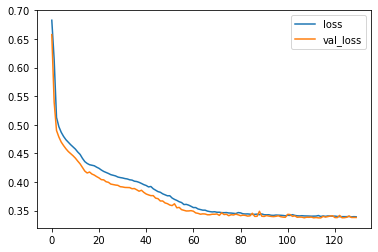

In [267]:
loss.plot()

In [268]:
preds=model.predict_classes(X_test)       

In [258]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [269]:
accuracy_score(y_test,preds)

0.8585

In [270]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.72      0.46      0.56       393

    accuracy                           0.86      2000
   macro avg       0.80      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000



In [271]:
confusion_matrix(preds,y_test)

array([[1535,  211],
       [  72,  182]], dtype=int64)

# CNN

In [276]:
from tensorflow.keras.datasets import mnist

In [279]:
mnist.load_data

<function tensorflow.python.keras.datasets.mnist.load_data(path='mnist.npz')>

In [281]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11493376/11490434 [==============================] - 10s 1us/step


In [282]:
x_train.shape

(60000, 28, 28)

In [284]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [4]:
import os

In [5]:
data_dir='C:\\Users\\GTDNL\\cell_images'

In [6]:
os.listdir(data_dir)

['test', 'train']

In [10]:
test_path='C:\\Users\\GTDNL\\cell_images\\test\\'
train_path='C:\\Users\\GTDNL\\cell_images\\train\\'

In [19]:
os.listdir(test_path+'uninfected')

['C100P61ThinF_IMG_20150918_144104_cell_34.png',
 'C100P61ThinF_IMG_20150918_144348_cell_108.png',
 'C100P61ThinF_IMG_20150918_145042_cell_33.png',
 'C100P61ThinF_IMG_20150918_145422_cell_138.png',
 'C100P61ThinF_IMG_20150918_145938_cell_145.png',
 'C100P61ThinF_IMG_20150918_150041_cell_4.png',
 'C100P61ThinF_IMG_20150918_150041_cell_67.png',
 'C101P62ThinF_IMG_20150918_151149_cell_28.png',
 'C101P62ThinF_IMG_20150918_151149_cell_43.png',
 'C101P62ThinF_IMG_20150918_151335_cell_26.png',
 'C101P62ThinF_IMG_20150918_151942_cell_39.png',
 'C101P62ThinF_IMG_20150923_170344_cell_66.png',
 'C102P63ThinF_IMG_20150918_161826_cell_133.png',
 'C102P63ThinF_IMG_20150918_161826_cell_144.png',
 'C102P63ThinF_IMG_20150918_162155_cell_5.png',
 'C102P63ThinF_IMG_20150918_162155_cell_66.png',
 'C102P63ThinF_IMG_20150918_162511_cell_56.png',
 'C103P64ThinF_IMG_20150918_164331_cell_160.png',
 'C103P64ThinF_IMG_20150918_164331_cell_72.png',
 'C103P64ThinF_IMG_20150918_164553_cell_163.png',
 'C103P64ThinF_

In [6]:
from matplotlib.image import imread

In [36]:
width=[]
height=[]

for image_filename in os.listdir(test_path+'uninfected'):
    
    img=imread(test_path+'uninfected\\'+image_filename)
    wi,hi,col=img.shape
    width.append(wi)
    height.append(hi)

In [38]:
len(width)

1300

In [45]:
np.mean(height)

130.75

In [46]:
# predict the class of the dataset

'C:\\Users\\GTDNL\\cell_images\\train\\uninfected\\'

In [48]:
test_path

'C:\\Users\\GTDNL\\cell_images\\test\\'

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
image_gen=ImageDataGenerator(rotation_range=20,width_shift_range=0.2,height_shift_range=0.1
                            ,shear_range=0.1,zoom_range=0.1,horizontal_flip=True)

In [77]:
os.listdir(test_path+'uninfected\\')[0]

'C100P61ThinF_IMG_20150918_144104_cell_34.png'

In [75]:
para=test_path+'uninfected\\'+'C100P61ThinF_IMG_20150918_144104_cell_34.png'


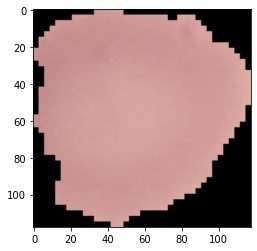

In [82]:
plt.imshow(imread(para))

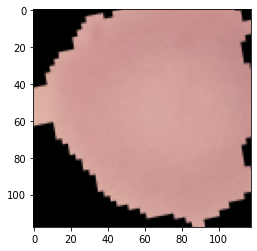

In [95]:
plt.imshow(image_gen.random_transform(imread(para)))

In [85]:
image_gen.random_transform(imread(para))

array([[[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.8071519 , 0.6071519 , 0.59146565],
        [0.8126083 , 0.6126083 , 0.59692204],
        [0.8187992 , 0.6187992 , 0.60311294]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.8033669 , 0.6033669 , 0.58768064],
        [0.80883896, 0.6085557 , 0.5928694 ],
        [0.8123828 , 0.6123828 , 0.59669656]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.80042833, 0.5995957 , 0.58390945],
        [0.8041259 , 0.59852564, 0.58283937],
        [0.8075198 , 0.6017215 , 0.58603525]],

       ...,

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0

In [11]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [12]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Conv2D,MaxPool2D,Flatten

In [14]:
model=Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),activation='relu',input_shape=(130,130,3)))
model.add(MaxPool2D(pool_size=(3,3),strides=(1,1)))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=(130,130,3)))
model.add(MaxPool2D(pool_size=(3,3),strides=(1,1),padding='same'))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=(130,130,3)))
model.add(MaxPool2D(pool_size=(3,3),strides=(1,1),padding='same'))

model.add(Flatten())

model.add(Dense(100,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(45,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1,activation='sigmoid'))

In [16]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [25]:
train_gen=image_gen.flow_from_directory(train_path,target_size=[130,130],
                                        color_mode='rgb',class_mode='binary',batch_size=20)

Found 24958 images belonging to 2 classes.


In [26]:
test_gen=image_gen.flow_from_directory(test_path,target_size=[130,130],
                                      color_mode='rgb',class_mode='binary'
                                      ,shuffle=False,batch_size=20)

Found 2600 images belonging to 2 classes.


In [97]:
#model.fit_generator(train_gen,steps_per_epoch=10,epochs=10,validation_data=test_gen)

In [21]:
from tensorflow.keras.models import load_model

In [101]:
model.save('mala_detec.h5')

In [22]:
model=load_model('malaria_detector.h5')

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0

In [27]:
model.evaluate_generator(test_gen)

  ...
    to  
  ['...']


[46.13598880898807, 0.815]

In [28]:
test_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [30]:
test_gen.classes

array([0, 0, 0, ..., 1, 1, 1])

In [60]:
preds=model.predict_generator(test_gen)

In [32]:
from sklearn.metrics import confusion_matrix

In [61]:
preds=preds>0.5

In [62]:
preds

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

In [63]:
confusion_matrix(preds,test_gen.classes)

array([[1272,  459],
       [  28,  841]], dtype=int64)

In [88]:
from tensorflow.keras.preprocessing import image

In [89]:
img=image.load_img(si,target_size=[130,130])

In [66]:
train_path

'C:\\Users\\GTDNL\\cell_images\\train\\'

In [78]:
os.listdir(train_path+'uninfected\\')[1]

'C100P61ThinF_IMG_20150918_144104_cell_131.png'

In [79]:
si=train_path+'uninfected\\'+'C100P61ThinF_IMG_20150918_144104_cell_131.png'

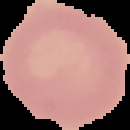

In [84]:
image

In [90]:
img_arr=image.img_to_array(img)

In [95]:
img=img_arr.reshape(1,130,130,3)

In [96]:
model.predict_generator(img)

array([[1.]], dtype=float32)

# Recurrent neural network

In [7]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [8]:
help(TimeseriesGenerator)

Help on class TimeseriesGenerator in module tensorflow.python.keras.preprocessing.sequence:

class TimeseriesGenerator(keras_preprocessing.sequence.TimeseriesGenerator, tensorflow.python.keras.utils.data_utils.Sequence)
 |  TimeseriesGenerator(data, targets, length, sampling_rate=1, stride=1, start_index=0, end_index=None, shuffle=False, reverse=False, batch_size=128)
 |  
 |  Utility class for generating batches of temporal data.
 |  This class takes in a sequence of data-points gathered at
 |  equal intervals, along with time series parameters such as
 |  stride, length of history, etc., to produce batches for
 |  training/validation.
 |  # Arguments
 |      data: Indexable generator (such as list or Numpy array)
 |          containing consecutive data points (timesteps).
 |          The data should be at 2D, and axis 0 is expected
 |          to be the time dimension.
 |      targets: Targets corresponding to timesteps in `data`.
 |          It should have same length as `data`.
 | 

In [12]:
df=pd.read_csv('RSCCASN.csv',parse_dates=True,index_col='DATE')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 334 entries, 1992-01-01 to 2019-10-01
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   RSCCASN  334 non-null    int64
dtypes: int64(1)
memory usage: 5.2 KB


In [26]:
df.head()

,Sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558


In [16]:
df.columns=['Sales']

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
sd=StandardScaler()

In [20]:
len(df)

334

In [27]:
train=df.iloc[:316,:]
test=df.iloc[316:,:]

In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 316 entries, 1992-01-01 to 2018-04-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sales   316 non-null    int64
dtypes: int64(1)
memory usage: 4.9 KB


In [29]:
test

,Sales
DATE,
2018-05-01,23764
2018-06-01,21589
2018-07-01,21919
2018-08-01,23381
2018-09-01,20260
2018-10-01,21473
2018-11-01,25831
2018-12-01,34706
2019-01-01,16410


In [30]:
train=sd.fit_transform(train)
test=sd.transform(test)

In [34]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [46]:
generator=TimeseriesGenerator(train,train,length=10,batch_size=2,shuffle=False)

In [47]:
x,y=generator[0]

In [49]:
y

array([[-0.9153314 ],
       [ 0.46019152]])

In [39]:
train

array([[-1.72618002e+00],
       [-1.61435199e+00],
       [-1.43286999e+00],
       [-1.25615880e+00],
       [-1.22619805e+00],
       [-1.29795119e+00],
       [-1.31302698e+00],
       [-1.04395271e+00],
       [-1.22333556e+00],
       [-1.09337841e+00],
       [-9.15331399e-01],
       [ 4.60191517e-01],
       [-1.61855031e+00],
       [-1.61435199e+00],
       [-1.37733764e+00],
       [-1.16723071e+00],
       [-1.12982748e+00],
       [-1.21150392e+00],
       [-1.18116151e+00],
       [-1.02200694e+00],
       [-1.13936912e+00],
       [-1.07582179e+00],
       [-8.05984197e-01],
       [ 5.47211279e-01],
       [-1.66091520e+00],
       [-1.54221719e+00],
       [-1.15692574e+00],
       [-1.16684905e+00],
       [-1.14013245e+00],
       [-1.16226906e+00],
       [-1.19242064e+00],
       [-9.21056383e-01],
       [-1.10043923e+00],
       [-1.00254199e+00],
       [-6.92629506e-01],
       [ 7.69531506e-01],
       [-1.61549699e+00],
       [-1.53095805e+00],
       [-1.1

# nlp

In [4]:
path='shakespeare.txt'

In [11]:
text=open(path).read()

In [12]:
print(text[:1000])


                     1
  From fairest creatures we desire increase,
  That thereby beauty's rose might never die,
  But as the riper should by time decease,
  His tender heir might bear his memory:
  But thou contracted to thine own bright eyes,
  Feed'st thy light's flame with self-substantial fuel,
  Making a famine where abundance lies,
  Thy self thy foe, to thy sweet self too cruel:
  Thou that art now the world's fresh ornament,
  And only herald to the gaudy spring,
  Within thine own bud buriest thy content,
  And tender churl mak'st waste in niggarding:
    Pity the world, or else this glutton be,
    To eat the world's due, by the grave and thee.


                     2
  When forty winters shall besiege thy brow,
  And dig deep trenches in thy beauty's field,
  Thy youth's proud livery so gazed on now,
  Will be a tattered weed of small worth held:  
  Then being asked, where all thy beauty lies,
  Where all the treasure of thy lusty days;
  To say within thine own deep su

In [14]:
len(text)

5445609

In [16]:
vocabs=set(text)

In [24]:
text[309]

'n'

In [27]:
enumerate(vocabs)

In [69]:
char_ind={char:ind for ind,char in enumerate(vocabs)}

In [70]:
ind_char={ind:char for ind,char in enumerate(vocabs)}

In [44]:
char_ind['F']

52

In [62]:
ind_char=np.array(text)

In [72]:
ind_char

{0: '6',
 1: 'B',
 2: 'g',
 3: 'Q',
 4: 'k',
 5: 'p',
 6: 'I',
 7: 'x',
 8: 'Y',
 9: 'R',
 10: '3',
 11: '0',
 12: 't',
 13: '<',
 14: '4',
 15: '7',
 16: 'w',
 17: ')',
 18: 'd',
 19: 'e',
 20: 'q',
 21: '2',
 22: 'V',
 23: ']',
 24: '(',
 25: 'h',
 26: 'G',
 27: 'U',
 28: '?',
 29: 'n',
 30: 'A',
 31: 'v',
 32: '8',
 33: '_',
 34: '&',
 35: 'K',
 36: '1',
 37: 'z',
 38: 'T',
 39: 'X',
 40: 'l',
 41: 'r',
 42: 's',
 43: '>',
 44: 'u',
 45: 'P',
 46: 'L',
 47: ';',
 48: 'Z',
 49: ' ',
 50: '[',
 51: 'O',
 52: 'F',
 53: 'c',
 54: 'j',
 55: 'W',
 56: ':',
 57: '|',
 58: 'i',
 59: '!',
 60: '5',
 61: 'f',
 62: '"',
 63: 'a',
 64: 'y',
 65: 'C',
 66: '-',
 67: 'b',
 68: "'",
 69: 'm',
 70: 'D',
 71: '`',
 72: 'o',
 73: '}',
 74: '\n',
 75: 'N',
 76: ',',
 77: '9',
 78: 'M',
 79: '.',
 80: 'J',
 81: 'H',
 82: 'E',
 83: 'S'}

In [48]:
encoded_txt=np.array([char_ind[c] for c in text])

In [49]:
encoded_txt

array([74, 49, 49, ..., 82, 75, 70])

In [66]:
char_dataset=tf.data.Dataset.from_tensor_slices(encoded_txt)

In [67]:
char_dataset

<TensorSliceDataset shapes: (), types: tf.int32>

In [75]:
for i in char_dataset.take(500):
    print(ind_char[i.numpy()])



 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
1


 
 
F
r
o
m
 
f
a
i
r
e
s
t
 
c
r
e
a
t
u
r
e
s
 
w
e
 
d
e
s
i
r
e
 
i
n
c
r
e
a
s
e
,


 
 
T
h
a
t
 
t
h
e
r
e
b
y
 
b
e
a
u
t
y
'
s
 
r
o
s
e
 
m
i
g
h
t
 
n
e
v
e
r
 
d
i
e
,


 
 
B
u
t
 
a
s
 
t
h
e
 
r
i
p
e
r
 
s
h
o
u
l
d
 
b
y
 
t
i
m
e
 
d
e
c
e
a
s
e
,


 
 
H
i
s
 
t
e
n
d
e
r
 
h
e
i
r
 
m
i
g
h
t
 
b
e
a
r
 
h
i
s
 
m
e
m
o
r
y
:


 
 
B
u
t
 
t
h
o
u
 
c
o
n
t
r
a
c
t
e
d
 
t
o
 
t
h
i
n
e
 
o
w
n
 
b
r
i
g
h
t
 
e
y
e
s
,


 
 
F
e
e
d
'
s
t
 
t
h
y
 
l
i
g
h
t
'
s
 
f
l
a
m
e
 
w
i
t
h
 
s
e
l
f
-
s
u
b
s
t
a
n
t
i
a
l
 
f
u
e
l
,


 
 
M
a
k
i
n
g
 
a
 
f
a
m
i
n
e
 
w
h
e
r
e
 
a
b
u
n
d
a
n
c
e
 
l
i
e
s
,


 
 
T
h
y
 
s
e
l
f
 
t
h
y
 
f
o
e
,
 
t
o
 
t
h
y
 
s
w
e
e
t
 
s
e
l
f
 
t
o
o
 
c
r
u
e
l
:


 
 
T
h
o
u
 
t
h
a
t
 
a
r
t
 
n
o
w
 
t
h
e
 
w
o
r
l
d
'
s
 
f
r
e
s
h
 
o
r
n
a
m
e
n
t
,


 
 
A
n
d
 
o
n
l
y
 
h
e
r
a
l
d
 
t
o
 
t
h
e
 
g
a
u
d
y
 
s
p
r
i
n
g
,


 
 
W
i
t
h
i
n
 
t
h
i
n
e
 
o
w
n
 
b
u


In [ ]:
char_dataset.batch()